# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

Цель работы - провести исследовательский анализ данных и выяснить зависимости стоимости недвижимости от различных факторов.

Работать будем с выгрузкой данных real_estate_data.csv.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Содержание работы:
1. [Шаг 1. Изучение данных](#p1)
2. [Шаг 2. Предобработка данных](#p2)   
3. [Шаг 3. Добавление недостающих столбцов в таблицу](#p3) 
4. [Шаг 4. Исследовательский анализ данных](#p4) 
    <br>4.1 [Изучение площади, цены, числа комнат, высоты потолков](#p4_1)
    <br>4.2 [Время продажи](#p4_2)
    <br>4.3 [Анализ редких и выбивающихся значений](#p4_3)
    <br>4.4 [Анализ стоимости квартиры ](#p4_4)
    <br>4.5 [Топ-10 населенных пунктов по чилу объявлений](#p4_5)
    <br>4.6 [Расстояние до центра](#p4_6)
    <br>4.7 [Анализ стоимости квартир в Центре Санкт-Петербурга](#p4_7)
4. [Шаг 5. Общий вывод исследования](#p5)     
    


<b> Шаг 1. Откройте файл с данными и изучите общую информацию. <a name="p1"></a>

Читаем файл с данными с разделителем `\t`.

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<b> Вывод

Названия столбцов вполне корректные, менять не будем.

Обнаружены пустые значения во многих столбцах. Предположим, исходя из предоставленных данных, что ряд пустых значений правильнее так и оставить пустыми, т.к. они не влияют на исследование. С остальными же нужно что-то делать. 



<b> Шаг 2. Предобработка данных <a name="p2"></a>

Сразу изменим пустые значения в  количественном столбце `balcony` на 0. Это как мининимум логичнее.

In [3]:
df['balcony'] = df['balcony'].fillna(0)
df[df['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [4]:
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Теперь у нас либо нет балконов, то есть 0, либо от 1 до 5. Это логично.

------------------------------
Наблюдается очень много пустых значений в столбце `ceiling_height`. Рассмотрим данные подробнее.

In [5]:
df['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

Очень слабо себе представляю высоту потолков в 100 и даже в 27 метров. Похоже на ошибки в данных или выбросы. Посчитаем количество квартир с потолками больше 5 метров.

In [6]:
len(df.query('ceiling_height > 5'))

36

In [7]:
df.query('ceiling_height > 5').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Если у квартиры площадью 399 метров мы еще можем предположить высоту потолка в 5,6 метра (вдруг это пенхаус или дом), то у площади в 75 квадратов на 2 этаже высота потолков в 32 метра невозможна. Что за прямоугольник?)

Предположу, что такие значения появились из-за ручного ввода информации: кто-то не прописал запятую и вместо 3.2 получилось 32 метра.

Произведем замену: разделим значения в диапазоне от 20 до 40 метров на 10.

In [8]:
# возможно не оптимальный способ замены, прошу подсказки как оптимальнее написать код в данном случае
df['ceiling_height'][(df['ceiling_height'] >= 20) & (df['ceiling_height'] <= 40)] = df['ceiling_height'] / 10

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df.query('ceiling_height > 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,...,8.0,0.0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,...,NaN,0.0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Эти значения трогать не будем. На медиианную они влиять будут не сильно,т.к. их не так много. Будем считать их выбросами.

Найдем медианную величину потолка и заменим Nan-ы на нее.

In [10]:
df['ceiling_height'].median()

2.65

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Незаполненных потолков не осталось.

--------------------------
Проверим пустые строки в столбце `living_area`.

In [12]:
df[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.65,9.0,NaN,4,NaN,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Многовато пустых значений. Сгруппируем данные по общей площади создав равные 5 групп по количеству квартир. посчитаем медиану и среднюю по жилой площади.

In [13]:
df['area_group'] = pd.qcut(df['total_area'],5)
df.groupby('area_group').agg({'living_area':['count','median','mean']})

living_area                  
                     count median       mean
area_group                                  
(11.999, 37.6]        4408   17.0  17.047407
(37.6, 46.0]          4558   20.2  22.623032
(46.0, 58.0]          4201   30.5  30.507496
(58.0, 75.0]          4416   40.0  39.430319
(75.0, 900.0]         4213   55.0  64.205155

Заменим пустые значения в столбце `living_area` на медиану по соответствующей группе площади.

In [14]:
df['living_area'] = df['living_area'].fillna(df.groupby('area_group')['living_area'].transform('median'))

--------------------------------
Аналогичные манипуляции для заполнения пропусков произведем и с площадью кухни.

In [15]:
df.groupby('area_group').agg({'kitchen_area':['count','median','mean']})

kitchen_area                  
                      count median       mean
area_group                                   
(11.999, 37.6]         4048    8.0   7.865850
(37.6, 46.0]           4534    9.0   8.967042
(46.0, 58.0]           4198    8.4   9.104631
(58.0, 75.0]           4410    9.8  10.384454
(75.0, 900.0]          4231   14.0  16.521302

In [16]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('area_group')['kitchen_area'].transform('median'))
del df['area_group']

-----------------------------------

In [17]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Предположим, что если не указана галочка в поле апартаменты, то логично заменить пропущенные значения на False.

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [19]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

Поскольку данные в столбце `days_exposition` могут быть очень разными и все значения имеют место быть, нам кажется, что менять пустые значения на среднее или медианное не совсем корректно.

Заменим Nan-ы на -999, чтобы избавиться от пустоты и сохранить столбец с числовым типом.

In [20]:
df['days_exposition'] = df['days_exposition'].fillna(-999)

In [21]:
df[(df['days_exposition'] > -999) & (df['days_exposition'] < 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Преобразуем тип `first_day_exposition` в дату.

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

Таким образом, мы преобразовали данные, необходимые нам для дальнейшего анализа и заполнили пропуски в некоторых столбцах.

<b> Шаг 3. Посчитайте и добавьте в таблицу <a name="p3"></a>

Рассчитаем и добавим в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (первый, последний, другой);
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [23]:
#цена кв. метра
df['cost_per_metr'] = df['last_price'] / df['total_area'] 

In [24]:
#день недели
df['weekday'] = df['first_day_exposition'].dt.weekday
#месяц
df['month'] = df['first_day_exposition'].dt.month
#год
df['year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_metr,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,-999.0,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,55.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Напишем функцию для категоризации этажа:

In [25]:
def category_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor ==  floors_total and floor != 1:
        return 'последний'  
    else:
        return 'другой' 
df['floor_cat'] = df.apply(category_floor, axis=1)
df['floor_cat'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_cat, dtype: int64

Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [26]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['living_to_total'].head(5)

0    0.472222
1    0.460396
2    0.612500
3    0.345912
4    0.320000
Name: living_to_total, dtype: float64

In [27]:
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']
df['kitchen_to_total'].head()

0    0.231481
1    0.272277
2    0.148214
3    0.088050
4    0.410000
Name: kitchen_to_total, dtype: float64

<b> Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:<a name="p4"></a>

<b> 4.1 Изучим площадь, цену, число комнат, высоту потолков. <a name="p4_1"></a>

In [28]:
print('Максимальная площадь:', df['total_area'].max())
print('Минимальная площадь:', df['total_area'].min())

Максимальная площадь: 900.0
Минимальная площадь: 12.0


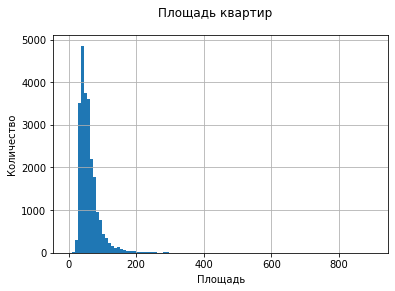

In [29]:
import matplotlib.pyplot as plt
df['total_area'].hist(bins=100,range = (0, 900));
plt.suptitle("Площадь квартир");
plt.xlabel('Площадь');
plt.ylabel('Количество');

По гистограмме отчестливо видно, что больше всего квартир с площадью менее 100 метров. Квартиры площадью более 200 встречаются крайне редко.


In [30]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Некрасиво. Переведем в миллионы путем создания доп. столбца. Сразу метры приведем в километры на будущее.

In [31]:
df['millions'] = df['last_price'] / 1000000
df['cost_per_metr_millions'] = df['cost_per_metr'] / 1000000
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000 

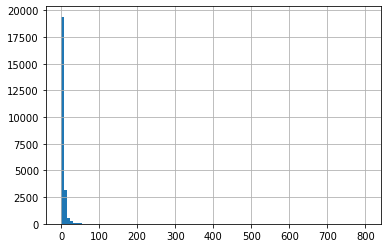

In [32]:
df['millions'].hist(bins=100,range = (0, 800));

Имеем очень узкий пик вначале. Логично, что цена квартиры в 763 млн. - что-то из ряда вон выходящее. Может Шувалов квартиру свою чесно заработанную квартиру продавал и снарядил нас выбросом)
Для наглядности построим еще одну гистограмму с ценой до 20 млн.

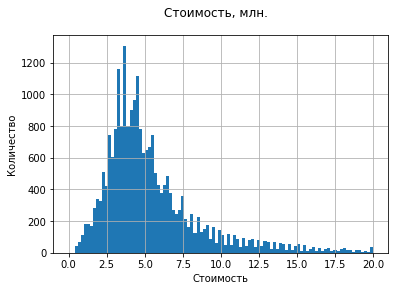

In [33]:
df['millions'].hist(bins=100,range = (0, 20));
plt.suptitle("Стоимость, млн.");
plt.xlabel('Стоимость');
plt.ylabel('Количество');

Здесь видно, что пик стоимости приходится на квартиры с ценами от 3 до 5 млн. Дальше, с ростом цен, видно стандартное распределение, идет постепенное снижение количества квартир.

In [34]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

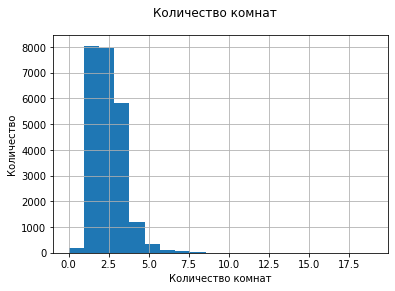

In [35]:
df['rooms'].hist(bins=20);
plt.suptitle("Количество комнат");
plt.xlabel('Количество комнат');
plt.ylabel('Количество');

Самых популярных однокомнатных квартир лишь на немного больше, чем двухкомнатных. Трешек в продаже тоже достаточно много.

In [36]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.702518
std          0.679234
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

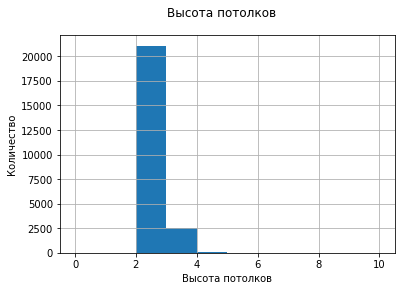

In [37]:
df['ceiling_height'].hist(bins=10, range=(0,10));
plt.suptitle("Высота потолков");
plt.xlabel('Высота потолков');
plt.ylabel('Количество');

Стандартная высота потолков: 2 - 3 метра. Другие значения встречаются, но реже.

---------------------------
<b>4.2 Время продажи <a name="p4_2"></a></b>

Рассмотрим время продажи квартиры в днях. Держим в уме, что ранее мы не стали менять пустые значения на медианные, чтобы не исказить выборку и заменили их на -999.

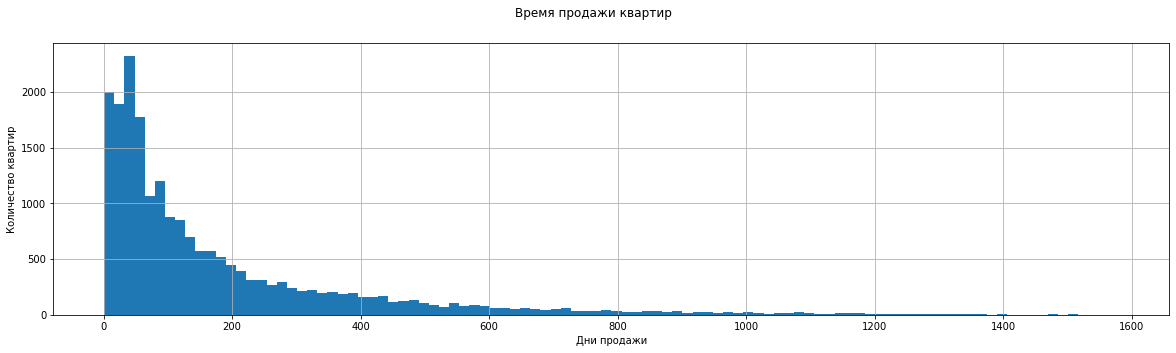

In [38]:
df['days_exposition'][df['days_exposition'] > 0].hist(bins=100, figsize = (20, 5));
plt.suptitle("Время продажи квартир");
plt.xlabel('Дни продажи');
plt.ylabel('Количество квартир');

На графике видно, что больше всего квартир продается за период до 100 дней. Но есть и очень тяжелые экземпляры, продающиеся годами.

Найдем медиану и среднее.

In [39]:
df['days_exposition'][df['days_exposition'] > 0].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Неликвидные квартиры очень влияют на среднее. По медиане квартиры продаются 95 дней. Но если вы смогли продать квартиру за 45 дней, то вы красавчик, попавший в 25% лучших!

<b> 4.3 Анализ редких и выбивающихся значений <a name="p4_3"></a>

Проанализируем долгопродающиеся квартиры. Возьмем срок продажи более 1100 дней как неразумно долгий.

In [40]:
correct_exposition = df.query('days_exposition > 0 ') 

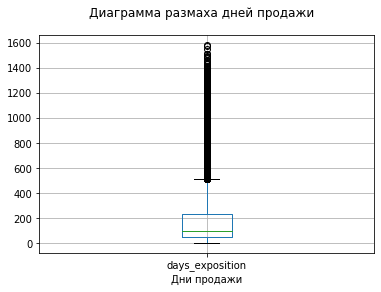

In [41]:
correct_exposition.boxplot(column='days_exposition');
plt.suptitle("Диаграмма размаха дней продажи");
plt.xlabel('Дни продажи');

Если верить диаграме размаха, то квартиры, продающиеся дольше 500 дней можно считать выбросами. Спорное утверждение, конечно. Ведь некоторые квартиры действительно могут продаваться долго ввиду разных причин. Чтобы не терять слишком много отбросим продающиеся дольше 700 дней квартиры и сохраним выборку в отдельном семпле.

In [42]:
correct = correct_exposition.query('days_exposition < 700 ')

In [43]:
len(correct)

19659

In [44]:
len(correct) / len(correct_exposition)

0.9581343210839263

Потеряли меньше тысячи квартир. Менее 5%. Ну что поделать(

-----------------------------------
<b> 4.4 Анализ стоимости квартиры <a name="p4_4"></a>

In [45]:
df['millions'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: millions, dtype: float64

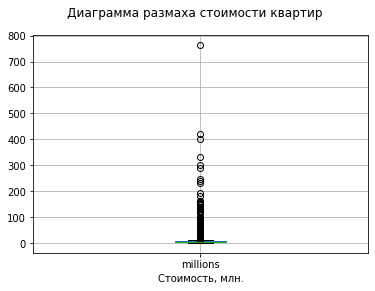

In [46]:
df.boxplot(column='millions');
plt.suptitle("Диаграмма размаха стоимости квартир");
plt.xlabel('Стоимость, млн.');

Средняя цена продажи квартиры 6,54 млн., в то время как медианная 4.65. Выбросы очень влияют на среднее.

Есди верить диаграмме размаха, то мы должны отбросить чуть ли не все квартиры дороже 7 миллионов. Не уверены, что это правильно. Некоторые квартиры вполне могут стоить дорого. Мы же не знаем насколько много золотых унитазов там внутри:) 

Взглянем на luxury квартиры поподробнее.

In [47]:
df.query('millions > 100').sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cost_per_metr,weekday,month,year,floor_cat,living_to_total,kitchen_to_total,millions,cost_per_metr_millions,cityCenters_nearest_km
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.00,10,False,...,1.907500e+06,5,9,2017,последний,0.625000,0.035000,763.00000,1.907500,3.956
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.70,25,False,...,4.666667e+05,2,12,2017,последний,0.455222,0.124444,420.00000,0.466667,7.877
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.00,9,False,...,1.000748e+06,5,2,2016,последний,0.508728,0.059850,401.30000,1.000748,2.389
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.00,5,False,...,1.736842e+06,2,4,2018,другой,0.500000,0.210526,330.00000,1.736842,1.197
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.00,5,False,...,4.854369e+05,0,12,2017,другой,0.417476,0.113269,300.00000,0.485437,5.297
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.70,6,False,...,1.542605e+06,1,3,2019,последний,0.339733,0.161067,289.23840,1.542605,1.073
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.80,4,False,...,8.575429e+05,0,4,2017,другой,0.639832,0.104305,245.00000,0.857543,6.235
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.00,7,False,...,5.853659e+05,5,4,2017,последний,0.531707,0.097561,240.00000,0.585366,5.297
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7.0,55.00,7,False,...,4.600000e+05,2,5,2017,последний,0.110000,0.080000,230.00000,0.460000,5.297
8900,13,190870000.0,268.0,2016-03-25,3,2.65,8.0,132.00,7,False,...,7.122015e+05,4,3,2016,другой,0.492537,0.149254,190.87000,0.712201,5.297


763 млн., 400 метров, 7 комнат, цена квадрата 1,9 млн. Копейки. Самое интересное, что продали ее всего за 33 дня)

Всего 37 квартир дороже 100 миллионов. Не так много.
Отбросим их перед анализом.

In [48]:
cost = df.query('millions < 100')

Перед анализом зависимостей найдем среднюю стоимость квартир и кв. метра.

In [49]:
print('Средняя стоимость продажи квартиры:',cost['millions'].mean().round(2),' млн. рублей')
print('Средняя стоимость кв. метра жилья:',cost['cost_per_metr'].mean().round(2),' рублей')

Средняя стоимость продажи квартиры: 6.25  млн. рублей
Средняя стоимость кв. метра жилья: 98567.62  рублей


Посмотрим, зависит ли цена от площади квартиры

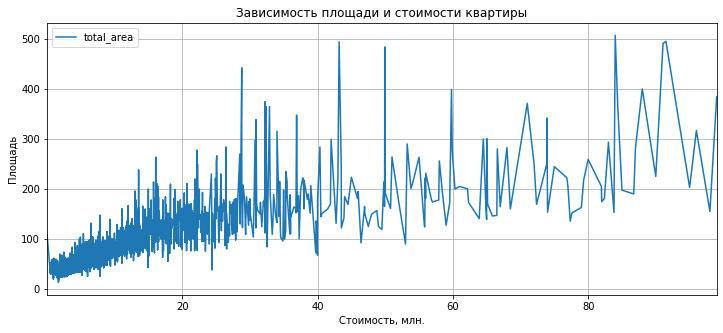

In [50]:
(cost     
         .pivot_table(index='millions', values='total_area', aggfunc='mean')
         .plot(grid=True, figsize=(12, 5), title='Зависимость площади и стоимости квартиры')
);
plt.xlabel('Стоимость, млн.');
plt.ylabel('Площадь');

In [51]:
cost['millions'].corr(cost['total_area']).round(2)

0.77

Конечно же зависит! Чем больше квартира, тем она дороже, это очевидно. Однако есть экземпляры, которые с небольшой площадью стоят как самолет. Корреляция 0,77 - <font color=brown>очень сильная положительная корреляция</font>

Рассмотрим **число комнат** и стоимость квартиры.

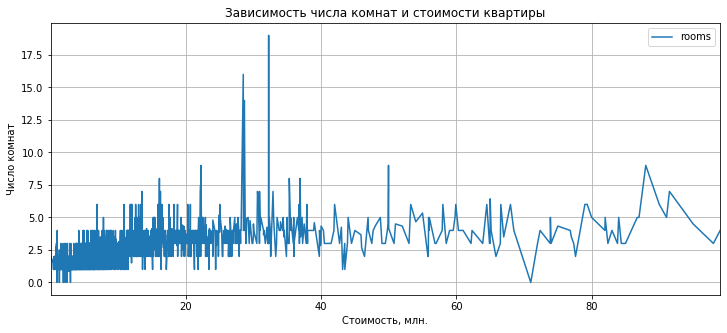

In [52]:
(cost     
         .pivot_table(index='millions', values='rooms', aggfunc='mean')
         .plot(grid=True, figsize=(12, 5), title='Зависимость числа комнат и стоимости квартиры')
);
plt.xlabel('Стоимость, млн.');
plt.ylabel('Число комнат');

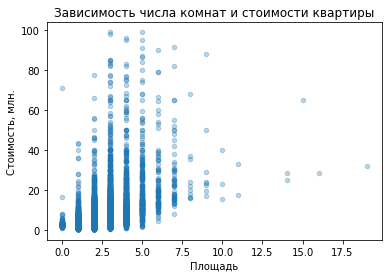

In [53]:
(cost 
         .plot(x = 'rooms', y = 'millions', kind = 'scatter', alpha = 0.3, 
               title='Зависимость числа комнат и стоимости квартиры')
);
plt.ylabel('Стоимость, млн.');
plt.xlabel('Площадь');

In [54]:
cost['millions'].corr(cost['rooms']).round(2)

0.47

Между числом комнат и стоимостью квартиры <font color=brown>сильная положительная корреляция</font>. На графике видно, что есть однокомнатные квартиры с ценой за 40 миллионов.

Найдем зависимость между стоимостью квадратного метра и ***этажем***.

In [55]:
cost.groupby('floor_cat')['cost_per_metr'].agg(['count','mean']).sort_values(by='count', ascending=False)


,count,mean
floor_cat,,
другой,17424,102835.489935
последний,3322,90959.857606
первый,2916,81732.781003


Первый этаж дешевле, последнего. А последний дешевле дугих этажей. Делаем вывод, что люди предпочитают не первый, и не последний. Но между первым и последним - лучше последний.

Рассмотрим зависимость цены кв. метра и ***расстояния от центра города*** (ранее мы привели его в километры для удобства).

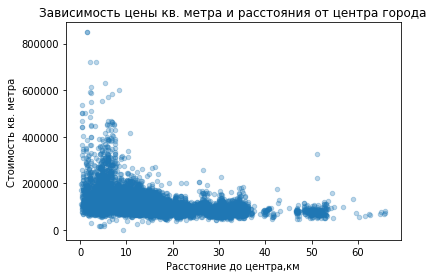

In [56]:
(cost  
         .plot(x = 'cityCenters_nearest_km', y = 'cost_per_metr', kind = 'scatter', alpha = 0.3, 
               title='Зависимость цены кв. метра и расстояния от центра города')
);
plt.xlabel('Расстояние до центра,км');
plt.ylabel('Стоимость кв. метра');

In [57]:
cost['cost_per_metr'].corr(cost['cityCenters_nearest_km']).round(2)

-0.36

Рассмотрим зависимость цены от ***года публикации объявления.***

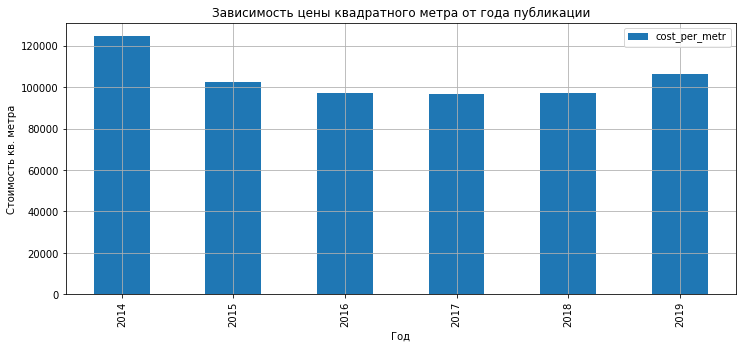

In [58]:
(cost    .pivot_table(index='year', values='cost_per_metr', aggfunc='mean')
         .plot(kind='bar',grid=True, figsize=(12, 5), title='Зависимость цены квадратного метра от года публикации')
);
plt.xlabel('Год');
plt.ylabel('Стоимость кв. метра');

По гистограмме видно, что в 2014 году квартиры стоили дороже. До 2018 года наблюдалось падение стоимости кв. метра жилплощади. В 2019 году рынок стал дорожать. Жаль нет данных по 2020 году, было бы интересно).

Рассмотрим ***месяц публикации.***

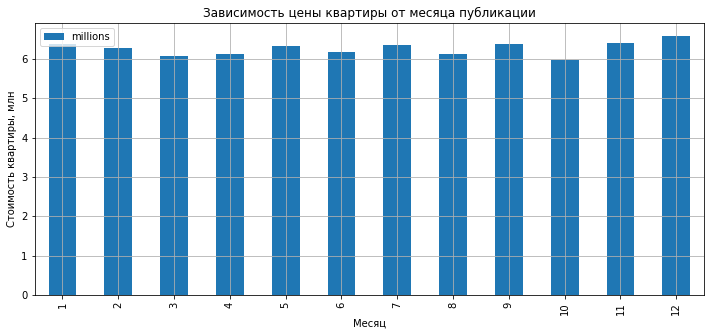

In [59]:
(cost    .pivot_table(index='month', values='millions', aggfunc='mean')
         .plot(kind='bar',grid=True, figsize=(12, 5), title='Зависимость цены квартиры от месяца публикации')
);
plt.xlabel('Месяц');
plt.ylabel('Стоимость квартиры, млн');

В целом от месяца публикации цена квартиры не зависиит. Но в ноябре-декабре квартиры чуть дороже, чем в среднем по году.

Рассмотрим ***дни недели***.

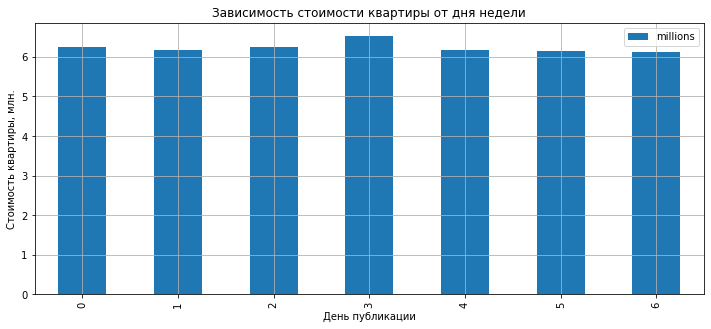

In [60]:
(cost    .pivot_table(index='weekday', values='millions', aggfunc='mean')
         .plot(kind='bar',grid=True, figsize=(12, 5), title='Зависимость стоимости квартиры от дня недели')
);
plt.xlabel('День публикации');
plt.ylabel('Стоимость квартиры, млн.');

Квартиры на продажу, опубликованные в четверг чуть дороже, чем в другие дни. Хм.

--------------
<b> 4.5 Топ-10 населенных пунктов о числу объявлений <a name="p4_5"></a></b>


Найдем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

In [61]:
locality = cost.groupby('locality_name')['cost_per_metr'].agg(['count','mean']).sort_values(by='count', ascending=False).head(10)
locality

,count,mean
locality_name,,
Санкт-Петербург,15684,113596.942447
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


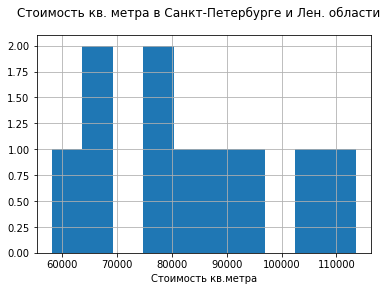

In [62]:
locality['mean'].hist(bins=10);
plt.suptitle("Стоимость кв. метра в Санкт-Петербурге и Лен. области");
plt.xlabel('Стоимость кв.метра');

Самая высокая цена зафиксирована в Санкт-Петеребурге. Там средний кв. метр стоит 113 тысяч.

Самая низкая цена из представленных в Выборге - всего 58 тысяч. 

На графике также видно, что есть населенные пункты, где средняя цена за квадрат одинаковая.

-------------------
<b> 4.6 Расстояние до центра <a name="p4_6"></a>
Исследуем город Санкт-Петербург и определим его Центральный район.

In [63]:
spb = df[df['locality_name']=='Санкт-Петербург']
len(spb)

15721

In [64]:
spb['centr_distance'] = spb['cityCenters_nearest_km'].round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Найдем для каждого километра от центра среднюю стоимость квартир в миллионах.

In [65]:
dist_cost = spb.pivot_table(index='centr_distance', values='millions', aggfunc=['mean'])
dist_cost

,mean
,millions
centr_distance,
0.0,31.449116
1.0,21.206721
2.0,17.788320
3.0,11.126581
4.0,13.304280
5.0,14.499121
6.0,15.338418
7.0,14.775153


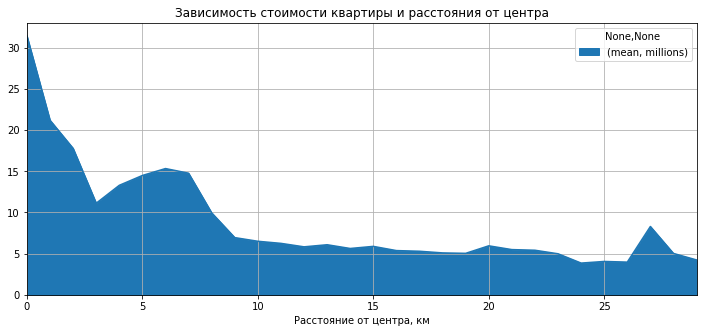

In [66]:
dist_cost.plot(kind='area',grid=True, figsize=(12, 5), title='Зависимость стоимости квартиры и расстояния от центра');
plt.xlabel('Расстояние от центра, км');

По графику можно предположить, что в Санкт-Петербурге расстояние от центра в 8 км считается центральной зоной. Дальше стоимость квартир снижается.

---------------
<b>4.7 Анализ стоимости квартир в Центре Санкт-Петербурга <a name="p4_7"></a>

In [67]:
spb_centr = df.query('locality_name =="Санкт-Петербург" and cityCenters_nearest_km < 8')
spb_centr.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cost_per_metr,weekday,month,year,floor_cat,living_to_total,kitchen_to_total,millions,cost_per_metr_millions,cityCenters_nearest_km
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,55.0,9,False,...,408176.100629,4,7,2015,другой,0.345912,0.088050,64.900,0.408176,6.800
24,8,6500000.0,97.2,2015-10-31,2,2.65,3.0,46.5,1,False,...,66872.427984,5,10,2015,первый,0.478395,0.201646,6.500,0.066872,2.336
35,6,15500000.0,149.0,2017-06-26,5,2.65,5.0,104.0,4,False,...,104026.845638,0,6,2017,другой,0.697987,0.114094,15.500,0.104027,3.502
51,7,45000000.0,161.0,2017-10-17,3,3.20,8.0,38.0,4,False,...,279503.105590,1,10,2017,другой,0.236025,0.310559,45.000,0.279503,6.589
52,20,11795000.0,136.0,2017-09-22,6,3.00,2.0,94.0,2,False,...,86727.941176,4,9,2017,последний,0.691176,0.080882,11.795,0.086728,6.582


In [68]:
print('Средняя площадь в центре: ', spb_centr['total_area'].mean().round(2))
print('Средняя площадь по городу:', df['total_area'].mean().round(2))
print('Средняя цена кв. м. в центре: ', spb_centr['cost_per_metr'].mean().round(2))
print('Средняя цена кв. м. по городу:', df['cost_per_metr'].mean().round(2))
print('Среднее число комнат в центре: ', spb_centr['rooms'].mean().round(2))
print('Среднее число комнат по городу:', df['rooms'].mean().round(2))
print('Средняя высота потолков в центре: ', spb_centr['ceiling_height'].mean().round(2))
print('Средняя высота потолков по городу:', df['ceiling_height'].mean().round(2))

Средняя площадь в центре:  92.33
Средняя площадь по городу: 60.35
Средняя цена кв. м. в центре:  144404.87
Средняя цена кв. м. по городу: 99421.66
Среднее число комнат в центре:  2.81
Среднее число комнат по городу: 2.07
Средняя высота потолков в центре:  2.93
Средняя высота потолков по городу: 2.7


In [69]:
def printing_stat(data):                 
    print('Средняя площадь:',data['total_area'].mean().round(2))
    print('Средняя цена кв. м.: ', data['cost_per_metr'].mean().round(2))
    print('Среднее число комнат: ', data['rooms'].mean().round(2))
    print('Средняя высота потолков: ', data['ceiling_height'].mean().round(2))
    
print('Статистика по городу:')
printing_stat(df)
print('Статистика в центре:')
printing_stat(spb_centr)

Статистика по городу:
Средняя площадь: 60.35
Средняя цена кв. м.:  99421.66
Среднее число комнат:  2.07
Средняя высота потолков:  2.7
Статистика в центре:
Средняя площадь: 92.33
Средняя цена кв. м.:  144404.87
Среднее число комнат:  2.81
Средняя высота потолков:  2.93


In [70]:
def pr1(data):
    d = {'total_area': 'площадь', 'cost_per_metr': 'цена кв. м.'}
    for key, value in d.items():
        print(value)
        print(data[key].mean().round(2))

pr1(spb_centr)

площадь
92.33
цена кв. м.
144404.87



<font color=brown>Как-то так получилось 🙄</font>

В центре квартиры больше, выше и, сооответственно, дороже. Все логично.

                        cityCenters_nearest_km     floor     rooms
cityCenters_nearest_km                1.000000  0.216542 -0.241825
floor                                 0.216542  1.000000 -0.004310
rooms                                -0.241825 -0.004310  1.000000


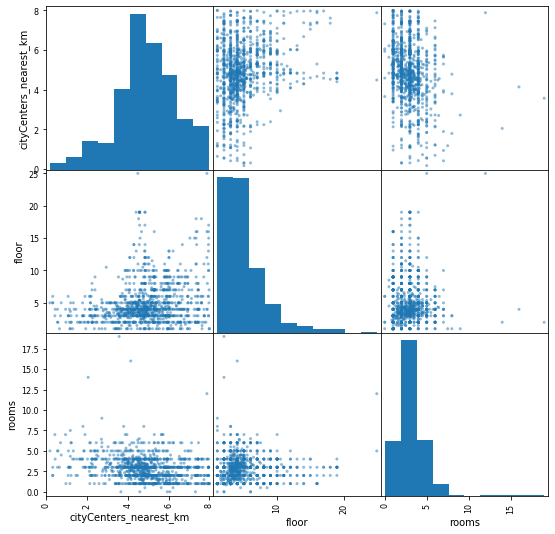

In [71]:
spb_centr1 = spb_centr.pivot_table(index='millions',values=['rooms','floor','cityCenters_nearest_km'])
print(spb_centr1.corr()) 
pd.plotting.scatter_matrix(spb_centr1, figsize=(9, 9)) ;

Матрица корреляции показывает нам слабую зависимость таких параметров как число комнат, цена, так же как и в среднем по городу. Но вот площадь квартиры очень влияет на цену.

<b> Шаг 5. Общий вывод <a name="p5"></a>

В ходе исследования были проанализированы данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Данные подготовлены, произведена замена пропусщенных значений.

Добавлены дополнительные столбцы, построены графики, зависимости.

Была определна рыночная стоимость недвижимости и ее зависимость от различных параметров.

Установлено, что в г. Санкт-Петерьурн средняя стоимость кв. метря квартир - 113 тысяч квартир.

Средний срок продажи недвижимости - 3 месяца. Если вы успели продать квартиру за 45 дней, то вы молодец.

Рассмотрены корреляции стоимости и площади, числа комнат, высоты потолков в Центре и в целом по городу.

Определена центральная область и параметры для нее. Сделаны выводы о влиянии различных параметров на цену.